In [ ]:
# ==================== #
# Author: Kenneth Chen #
# Student ID: 2100072  #
# ==================== #

# Notebook Configuration
GPU_COUNT = 1
WINDOWS = True

In [ ]:
!pip install -q pandas
!pip install -q seaborn
!pip install -q matplotlib
!pip install -q neptune-client

<img src="images/cifar10.PNG" width=700>

# Generative Adversarial Networks - CIFAR10
> Can we create a strong generative model for CIFAR10 using the GAN architecture?

## Background Research 📖

### Introduction 💡
The ultimate goal of Deep Learning is to be able to create a function that can <strong>effectively model any form of data distribution</strong>. History has time and time again displayed the impressive success of discriminators, models that learn to divide the data distribution/map a high dimensional vector to one that is lower (Goodfellow et al., 2014). For instance, tasks such as Image Classification are one type of discriminative modelling, as the high dimensional images are mapped into low dimensional probabilities of labels.

What about generative modelling? In generative modelling, the goal is instead given a data distribution to learn from, to produce or <strong>generate new examples</strong> that follow this distribution but still aim to be unique. Thus, a high performing generative model should be able to create examples that are both <strong>plausible</strong> (in that one can recognize what the generated example is supposed to be of) <strong>and indistinguishable</strong> from real data examples (Brownlee, 2019). Generative models can be Unsupervised or Semi-Supervised, depending on the exact task that one is trying to tackle. 

There are different approaches to network architectures when it comes to trying to achieve Generative Models:
<ul>
	<li>Generative Adversarial Networks (GAN) </li>
	<li>Diffusion Models</li>
	<li>Variational Auto Encoders (VAE)</li>
</ul>

<strong>GANs ⚔️</strong> <br />
GANs are the main focus of this notebook. Proposed by Ian Goodfellow in 2014, it became one of the more popular types of Generative Models used. For instance, the commonly known website <a href="thispersondoesnotexist.com">thispersondoesnotexist.com</a> uses the StyleGAN2 architecture (Karras et al., 2020), to generate high fidelity images of humans. The idea for GANs is that <strong>there are two networks that work against each other in a game</strong>, where they try to one up each other. Thus, this leads to improvement in both networks. More details are discussed under "What's inside a GAN? 🔍".

<strong>Diffusion Models ✨</strong><br /> 
These are the models that have been not only been successful, but widely popular as well. For instance, OpenAI Dall-E, Google Imagen, Stable Diffusion, Midjourney are models that fall under the category of Diffusion Models. (Muppalla and Hendryx, 2022). From a high level, it works like so:
<ul>
	<li>Noise is added to original images</li>
	<li>Noise is procedurally added until image is all noise</li>
	<li>The model then learns to remove the noise</li>
	<li>Guidance can be added in the form of e.g. text-to-image, to provide direction of the generation process</li>
</ul>

<img src="images/diffusion1.jpg" width=400/><br />
*Noise is procedurally added to the image. Image Credit: (Muppalla and Hendryx, 2022)*

<img src="images/diffusion2.jpg" width=400/><br />
*Model attempts to recreate the image. Image Credit: (Muppalla and Hendryx, 2022)*

<strong>Variational Auto Encoders 🎲</strong><br />
We first take a look at what Auto Encoders are. An Auto Encoder is trained for it to learn to copy the input to the output (Goodfellow, Bengio and Courville, 2016). This is done by having an <strong>encoder map the image</strong> to a compressed representation of the image (the inner nodes), to which the decoder <strong>uses this compressed representation</strong> to generate an image similar to the original. Note that the trick is to <strong>restrict the number of inner nodes</strong> inside the network, such that it is <strong>not able to generate a 1-to-1 copy</strong>. This way, it's forced to learn the most promiment of features to recognize, using the limited number of nodes.

The idea with Variational Auto Encoders is that <strong>instead of the encoder just mapping the image to a compressed representation</strong> (aka latent vector), we instead <strong>learn the distribution that the latent vector can take on</strong>. Using this, we can then randomly sample from the learned latent distribution, for the decoder to give us a newly and controlled generated image.

<img src="images/vae.PNG" width=400/><br />
*VAE Architecture. We note the learning of the latent distribution in the form of $\mu$ (mean) and $\sigma$ (standard deviation). Image Credit: (Rocca, 2019)*


### What's inside a GAN? 🔍
In a GAN, there are in fact two networks, a <strong>generator</strong> and a <strong>discriminator</strong> that improve each other by competing in a game scenario (Goodfellow, Bengio and Courville, 2016). The aim is to use the well established field of discriminators to assist the generator. The goal of the generator is to <strong>create realistic images</strong> that appear to be from the distribution of the training images, where as the goal of the discriminator is to determine <strong>if a given image is from the data distribution</strong>. The process goes as follows:
<ol>
	<li>Generator creates images</li>
	<li>Discriminator learns to distinguish real vs fake from a set of real images and these newly generated images</li>
	<li>Using the updated Discriminator, Generator learns to trick the Discriminator</li>
</ol>

Mathematically speaking, the process of GANs can be described as so. 
Suppose we have some a random distribution or a "prior", which we can sample from. We can denote this as $p_z(z)$, where $z$ represents a vector of a specific size. This vector acts as the input to our generative model $G$. The model is ultimately described as $G(z; \theta_g)$ where $\theta_g$ represents the parameters of the generative model.

On the other hand, our discriminator model $D$, takes in an input $x$, an image, which can be fully described as $D(x; \theta_d)$, where likewise, $\theta_d$ represents the parameters of the discriminative model. Being the discriminator, $D(x)$ returns the probability that an input $x$ is from the.

This "game" between the two models can be thought of as trying to optimize of minimax function of:

$$\underset{G}{\text{min}}\underset{D}{\text{max}} V(D, G) = \mathbb{E}_{x \sim p_{\text{data}}(x)} [\text{log}D(x)] + \mathbb{E}_{z \sim p_{\text{z}}(z)} [\text{log}(1 - D(G(z)))]$$

<em style="text: center">(Goodfellow et al., 2014)</em>

Essentially, the function $V$ takes in two inputs, our models $D$ and $G$, and returns an output that has two parts. The left hand part of the sum $\mathbb{E}_{x \thicksim p_{\text{data}}(x)} [\text{log}D(x)]$ represents "the expected value that the discriminator model predicts real data is real". The right hand part of the sum $\mathbb{E}_{z \thicksim p_{\text{z}}(z)} [\text{log}(1 - D(G(z)))]$ looks at given some random vector $z$, "what is the expected value that the discriminator model predicts fake data is fake", in that the value of the right hand part is maximum when discriminator model is successful at labeling the fake images of a generator as fake.

$\underset{G}{\text{min}}\underset{D}{\text{max}}$ aims to do two things. Firstly, what is the generator model $G$ that *minimizes the value*, which means *the discriminator labels generator's images as real*. Secondly what is the disciminator model $D$ that will maximize this value, which means **discriminator model predicts real images as real and fake images as fake**. These two perfectly optimize each other, when the best approach the discriminator can take is to <strong>just guess randomly</strong> as the generator images are on the same realism as the real data.

### Types of GANs 🍐
There many different types of GANs, however I believe the most differing pair is the Vanilla GAN and the Conditional GAN. The Vanilla GAN is what was proposed by Ian Goodfellow in 2014, which consists of the basic architecture with multi-layer perceptrons (MLPs). Conditional GANs are different in the aspect that one can provide additional information to the model, which could be thought of as a form of guidance similar to diffusion models.

<img src="images/vanilla.jpg" width=400><br/>
*Vanilla GAN architecture (Tewari, N.d.)*

<img src="images/conditional.jpg" width=400><br/>

*Conditional GAN architecture (Tewari, N.d.)*

We observe that there is an extra component of `y`, which represents the extra information presented both to the Generator and Discriminator. This extra information is usually in the form of class labels to allow one to possess control over the output, but it can be extended to different modal data, even something such as text (in which case it needs some sort of text processor).

One may think of Conditional GAN as a more *"supervised" version* of Vanilla GANs, as some condition techniques (in the form of perhaps label information) are provided **to support the adversarial training**. Conditional GANs have in fact become **the go-to method of generating high-quality images** (Kang et al., 2021). This may be due to the fact that **when image sizes become larger** and there is **no sense of direction**, there can be a **significant** amount of overlapping generation that occurs.

What's more, is that even among Conditional GANs, the category can be further broken down into different methods of **inputing this conditional information**. The common methods are:
<ol>
	<li>Conditioning by concatenation</li>
	<li>Conditioning with projection discriminator</li>
	<li>Conditioning with auxiliary classifier</li>
	<li>Conditioning with batch normalization</li>
</ol>

In this notebook, we utilize and explore the above 4 techniques.


### Uses of GANs 🧤

As a GAN is a generative model, there are a large number of applications of GANs (Brownlee, 2019). Personally, I find it interesting how the idea of GANs can be adjusted for any modal of data, as long as the architecture for the encoder and decoders are adjusted accordingly. Here are a few areas of GANs I believe are quite intriguing:
<ul>
	<li>Time Series</li>
	<li>Image Generation</li>
	<li>Music Generation</li>
	<li>Audio Generation</li>
	<li>Style Transfer (e.g. winter photo to summer photo, jazz to classical music)</li>
</ul>

Among them, I think Audio Generation stands out to me the most. The idea of using GANs in music composition sounds like a difficult challenge, but also an impressive feat if one could pull it off.

### The difficulty with GANs 🧩
Despite having achieved great success at generating realistic and sharp looking images, they are still remarkably difficult to train (Arjovsky and Bottou, 2017). Different symptoms/signs may appear as a result of non-optimal training process or architecture. Below, we attempt to discuss what such that we are able to know what to pay attention to, when developing our GANs as well.

#### Mode collapse
One of the largest and continuing issues with the GAN training process is mode collapse. Mode collapse is said to occur if the generator **maps multiple different vectors** $z$ to the same output of $x$, where $x$ is a vector which the <strong>discriminator assigns high probability of being real</strong> to. In other words, the generator **exploits the discovery** that a particular output can fool the generator and thus ultimately produces, <strong>decreasing the diversity of one's outputs</strong>.

#### Mode Dropping
This is another case of decreasing the diversity of one's outputs, however not in the same way as Mode Collapse. In Mode Collapse, diversity is decreased within the classes. However, in Mode Dropping, diversity is decreased **among the classes**. Specifically, the generator may learn that for certain classes, it is difficult to generate an image, sufficiently realistic enough to trick the generator. Thus the generator may learn to simply just ignore these difficult classes, to be the most effective in the game against discriminator.

#### Non-Lipschitz Continuity
A real-valued function $f: \mathbb{R} \rightarrow \mathbb{R}$ possesses the property of Lipschitz continuity if

$$ |f(x_1) - f(x_2) | \leq K|x_1 - x_2| $$

where $K$ is some constant and $x$ represents the input. Intuitively, this means that when we change the value of $x$, we can expect to be <strong>relatively small</strong>, in that the change can be described as a result of linear growth rather than <strong>uncontrolled growth</strong>.

**What does this mean in the context of neural networks?** Suppose we have some network that **does not** possess the property of being Lipschitz continuous (this is possible because neural networks are essentially a composition of functions). As there is no bound of $K$, it means the output of the function can grow uncontrollably and a small change in the input **can possibly lead to large changes in the output**. This is bad for GANs, as we lose our sense of control and also means that moving along one dimension may result in drastically different changes in the output.

If we can enforce Lipschitz continuity in GANs, it means that a small change in the input, guarantees a relative small change in the output as well, which is what we want. One method of achieving this is to utilize a different loss function in GANs such as Wasserstein Distance. We explore approaches to tackling this issue further in the *"Developing GANs"* section.

### **GAN Metrics**: what does it mean to be good?

The most straight forward method of telling whether the output of a GAN is good, is to well, use our human eyes. On a smaller-sized experiment or if one is assessing a few images, this may be a valid approach. However, when the amount of data scale up to a very large quantity (which naturally is the case with Deep Learning), the act of visually inspecting every output is **simply infeasible**. Besides, using our eye as a metric means our feedback is **qualitative**. This means if it comes down to comparing the performances of two incredibly well-performing models, it's also difficult for one to tell which one is better. Thus, we need to define a set of quantitative metrics that we can use to substitute the use of our human eyes.

There is no one metric that is the *"best"* (Borji, 2018). Each metric has its own advantages and disadvantages, but ideally an efficient evaluation metric should:
<ol>
	<li>high quality</li>
	<li>diverse</li>
	<li>disentangled latent space</li>
</ol>
<em>(Borji, 2018)</em>

What is **Disentangled Latent Space**?
Latent space is straight forward, it's the typically smaller representation that in the context of GANs, acts as the input to the generator network. Disentangled latent space means that going along one dimension of the latent space representation, the changes reflected in the output should have only an appropriate level of overlap with outputs achieved by going along a different dimension. Thus, there are a few cases:

![VAE Disentanglement](images/disentangled.JPG)<br />
*(Mathieu et al., 2019)*

Above is the context in Variational Auto Encoders, however as the problem statement of generator images to mimic the real distribution is the same, thus the evaluation metrics being the same as well, I use the image to explain how the concept of disentangled latent space in the context of GANs.

We see there are a total of 3 possible cases:
<ul>
	<li>Insufficient overlap</li>
	<li>Appropriate Overlap</li>
	<li>Too Much Overlap</li>
</ul>

In the case of insufficient overlap, we see that moving along the latent distribution $p(z)$ provides the property of independence, in that there are no two latent spaces that affect two features of the output. However, the problem is that the generated image distribution is not, does not take up much of our ideal output distribution $p_{\theta}(x)$. In the case of too much overlap, as indicated by the large overlapping regions, it tells us that moving along one dimension of the latent space leads to a change in many different images among the distribution (which in this 2d representation can be interpretted as changing too many of the same features). Thus, the ideal or appropriate level of overlap here, as seen in the center image, is where there is a good level of independence, in that moving along one dimension of the latent space vector results to changes associated only with the latent space vector, and where the covered area is also large, taking up most of the space of our distribution $p_{\theta}(x)$.

How about the two others -- quality and diversity? 

##### **Measuring Quality**  
What we mean by quality here is not the resolution of the image (doesn't make sense for the generator to output high-res images when the training data is low resolution). Here, quality means how well one is able to recognize an image, as the class it is intended to be. The two most popular metrics are **Inception Score** and **Frechet Inception Distance**. The term **inception** comes from the fact that these two metrics **actually use** a pretrained Inception classifier to aid in producing the metric values.
<ul>
	<li>Inception Score <strong>(IS)</strong></li>
	<li>Frechet Inception Distance <strong>(FID)</strong></li>
</ul>

##### **Measuring Diversity**  
If we simply **focused on quality-measuring metrics**, our models may still be susceptible to something like Mode Collapse or Mode Dropping. We try to aim for a quantitative metric such as:
<ul>
	<li>Learned Perceptual Image Patch Similarity <strong>(LPIPS)</strong></li>
	<li>Number of statistically-different bins <strong>(NDB)</strong></li>
	<li><strong>I-Variance</strong></li>
</ul>

Further details of these metrics are discussed in later sections, when we evaluate the models.

# The CIFAR10 Dataset
<img src="images/cifar_random.png" width=300 />

As per our assignment, we are instructed to utilize the CIFAR10 dataset to **generate 1000 small colour images**. 

The CIFAR-10 dataset consists of **60000** `32x32` colour images in a total of 10 classes, with 6000 images per class (Krizhevsky, 2009).

## Developing GAN 💻
> Let's get to building our Conditional GAN.

Why Conditional GANs? As mentioned during the above background research section, Conditional GANs are. On top of this, Conditional GANs allow the user to <strong>control</strong> the output, where as Va.

Besides, if one appreciates the idea of not knowing what a Vanilla GAN may output, a simple random module can be attached as the conditional information to somewhat *hack* the Conditional GAN into being a normal GAN.

### Objectives 🖊️
We identify the tasks and objectives we want to meet, which will be used as a guide throughout the development of our Conditional GAN.
<ol>
	<li>Explore the CIFAR10 dataset</li>
	<li>Implement and evaluate to find the best performing model</li>
	<li>Analyse the final model</li>
</ol>

### Importing Libraries
The necessary libraries are imported below.

In [152]:
import torch
from torch import nn
import torchvision
from torchvision import transforms
import torch.nn.functional as F

import copy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
import pandas as pd
import numpy as np

### Utility Functions 🔨
We define some utility functions below that will ease and help us with our analysis.

In [148]:
def loc_data(data, loc):
	datacopy = copy.deepcopy(data)
	arr = np.array(datacopy.loc[loc].drop('label'))
	label = datacopy.loc[loc]['label']
	root = int(len(arr) ** 0.5)
	arr.resize((root, root))
	return label, arr

def imshow(arr: list, label: list = None, figsize=None, shape = (32, 32, 3), is_int = None):
	if is_int == None:
		if type(arr[0]) == torch.Tensor:
			is_int = (arr[0].detach().cpu().numpy() > 1).sum() > 0
		else:
			is_int = (arr[0] > 1).sum() > 0
	if label == None:
		label = [''] * len(arr)

	height = int(len(arr) ** 0.5)
	width = math.ceil(len(arr) / height)

	X_means = np.array([0.4919, 0.4827, 0.4472])
	X_stds = np.array([0.2470, 0.2434, 0.2616])
	unnormalize = transforms.Normalize((-X_means / X_stds).tolist(), (1.0 / X_stds).tolist())

	if figsize == None:
		fig = plt.figure()
	else:
		fig = plt.figure(figsize=figsize)
	for i in range(height):
		for j in range(width):
			ax = fig.add_subplot(height, width, i * height + j + 1)
			ax.grid(False)
			ax.set_xticks([])
			ax.set_yticks([])
			show = arr[i * height + j]
			if type(arr[i * height + j]) != torch.Tensor:
				show = torch.Tensor(show)
			
			if show.min() < 0:
				show = unnormalize(show)
				show = torch.clamp(show, min = 0, max = 1)
				# ax.imshow((arr[i * height + j].squeeze(0).cpu().permute(1, 2, 0) / 255).type(torch.uint8 if is_int else float))
			# if (show.shape[0] == 1):
			# 	ax.imshow((show.squeeze(0).cpu()).type(torch.uint8 if is_int else torch.float), cmap='gray')
			# else:
			if len(show.squeeze(0).cpu().shape) == 2:
				ax.imshow((show.squeeze(0).detach().cpu()).type(torch.uint8 if is_int else torch.float), cmap='gray')
			else:

				try:
					ax.imshow((show.squeeze(0).detach().cpu().permute(1,2,0)).type(torch.uint8 if is_int else torch.float))
				except:
					ax.imshow((show.squeeze(0).detach().cpu()).type(torch.uint8 if is_int else torch.float))
			ax.set_title(label[i * height + j])

def df_to_tensor(df, shape = (32, 32)):
	return torch.tensor(df.values.reshape((-1, *shape)), dtype=torch.float32)

def preprocess(df):
	return df.copy() / 255

# Credits to StudioGAN for function reference
def set_deterministic_op_trainable(m):
	if isinstance(m, torch.nn.modules.conv.Conv2d):
		m.train()
	if isinstance(m, torch.nn.modules.conv.ConvTranspose2d):
		m.train()
	if isinstance(m, torch.nn.modules.linear.Linear):
		m.train()
	if isinstance(m, torch.nn.modules.Embedding):
		m.train()

def untrack_bn_statistics(m):
	if isinstance(m, torch.nn.modules.batchnorm._BatchNorm):
		m.track_running_stats = False

def track_bn_statistics(m):
	if isinstance(m, torch.nn.modules.batchnorm._BatchNorm):
		m.track_running_stats = True

class dummy_context_mgr():
	def __enter__(self):
		return None

	def __exit__(self, exc_type, exc_value, traceback):
		return False


def sample_y(y_sampler, batch_size, num_classes, device):
	if y_sampler == "totally_random":
		y_fake = torch.randint(low=0, high=num_classes, size=(batch_size, ), dtype=torch.long, device=device)

	elif y_sampler == "acending_some":
		assert batch_size % 8 == 0, "The size of batches should be a multiple of 8."
		num_classes_plot = batch_size // 8
		indices = np.random.permutation(num_classes)[:num_classes_plot]

	elif y_sampler == "acending_all":
		batch_size = num_classes * 8
		indices = [c for c in range(num_classes)]

	elif isinstance(y_sampler, int):
		y_fake = torch.tensor([y_sampler] * batch_size, dtype=torch.long).to(device)
	else:
		y_fake = None

	if y_sampler in ["acending_some", "acending_all"]:
		y_fake = []
		for idx in indices:
			y_fake += [idx] * 8
		y_fake = torch.tensor(y_fake, dtype=torch.long).to(device)
	return y_fake

from scipy.stats import truncnorm

def truncated_normal(size, threshold=1.):
	values = truncnorm.rvs(-threshold, threshold, size=size)
	return values

def sample_normal(batch_size, z_dim, truncation_factor, device):
	if truncation_factor == -1.0:
		latents = torch.randn(batch_size, z_dim, device=device)
	elif truncation_factor > 0:
		latents = torch.FloatTensor(truncated_normal([batch_size, z_dim], truncation_factor)).to(device)
	else:
		raise ValueError("truncated_factor must be positive.")
	return latents

def sample_zy(z_prior, batch_size, z_dim, num_classes, truncation_factor, y_sampler, radius, device):
	fake_labels = sample_y(y_sampler=y_sampler, batch_size=batch_size, num_classes=num_classes, device=device)
	batch_size = fake_labels.shape[0]

	if z_prior == "gaussian":
		zs = sample_normal(batch_size=batch_size, z_dim=z_dim, truncation_factor=truncation_factor, device=device)
	elif z_prior == "uniform":
		zs = torch.FloatTensor(batch_size, z_dim).uniform_(-1.0, 1.0).to(device)
	else:
		raise NotImplementedError

	if isinstance(radius, float) and radius > 0.0:
		if z_prior == "gaussian":
			zs_eps = zs + radius * sample_normal(batch_size, z_dim, -1.0, device)
		elif z_prior == "uniform":
			zs_eps = zs + radius * torch.FloatTensor(batch_size, z_dim).uniform_(-1.0, 1.0).to(device)
	else:
		zs_eps = None
	return zs, fake_labels, 


def make_GAN_trainable(Gen, Dis):
	Gen.train()
	Gen.apply(track_bn_statistics)
	Dis.train()
	Dis.apply(track_bn_statistics)

def make_GAN_trainable(Gen, Dis):
	Gen.eval()
	Gen.apply(set_deterministic_op_trainable)
	Dis.eval()
	Dis.apply(set_deterministic_op_trainable)

def peel_model(model):
	if isinstance(model, nn.DataParallel) or isinstance(model, nn.DistributedDataParallel):
		model = model.module
	return model

def toggle_grad(model, grad, num_freeze_layers=-1, is_stylegan=False):
	model = peel_model(model)
	if is_stylegan:
		for name, param in model.named_parameters():
			param.requires_grad = grad
	else:
		try:
			num_blocks = len(model.in_dims)
			assert num_freeze_layers < num_blocks,\
				"cannot freeze the {nfl}th block > total {nb} blocks.".format(nfl=num_freeze_layers,
																			nb=num_blocks)
		except:
			pass

		if num_freeze_layers == -1:
			for name, param in model.named_parameters():
				param.requires_grad = grad
		else:
			assert grad, "cannot freeze the model when grad is False"
			for name, param in model.named_parameters():
				param.requires_grad = True
				for layer in range(num_freeze_layers):
					block_name = "blocks.{layer}".format(layer=layer)
					if block_name in name:
						param.requires_grad = False

from torch import autograd

def cal_deriv(inputs, outputs, device):
	grads = autograd.grad(outputs=outputs,
						  inputs=inputs,
						  grad_outputs=torch.ones(outputs.size()).to(device),
						  create_graph=True,
						  retain_graph=True,
						  only_inputs=True)[0]
	return grads

def cal_r1_reg(adv_output, images, device):
	batch_size = images.size(0)
	grad_dout = cal_deriv(inputs=images, outputs=adv_output.sum(), device=device)
	grad_dout2 = grad_dout.pow(2)
	assert (grad_dout2.size() == images.size())
	r1_reg = 0.5 * grad_dout2.contiguous().view(batch_size, -1).sum(1).mean(0) + images[:,0,0,0].mean()*0
	return r1_reg

def cal_maxgrad_penalty(real_images, real_labels, fake_images, discriminator, device):
	batch_size, c, h, w = real_images.shape
	alpha = torch.rand(batch_size, 1)
	alpha = alpha.expand(batch_size, real_images.nelement() // batch_size).contiguous().view(batch_size, c, h, w)
	alpha = alpha.to(device)

	real_images = real_images.to(device)
	interpolates = alpha * real_images + ((1 - alpha) * fake_images)
	interpolates = interpolates.to(device)
	interpolates = autograd.Variable(interpolates, requires_grad=True)
	fake_dict = discriminator(interpolates, real_labels, eval=False)
	grads = cal_deriv(inputs=interpolates, outputs=fake_dict["adv_output"], device=device)
	grads = grads.view(grads.size(0), -1)

	maxgrad_penalty = torch.max(grads.norm(2, dim=1)**2) + interpolates[:,0,0,0].mean()*0
	return maxgrad_penalty

def generate_images(z_prior, truncation_factor, batch_size, z_dim, num_classes, y_sampler, radius, generator, discriminator,
					is_train, LOSS, RUN, MODEL, device, is_stylegan, generator_mapping, generator_synthesis, style_mixing_p,
					stylegan_update_emas, cal_trsp_cost):
	if is_train:
		truncation_factor = -1.0
		lo_steps = LOSS.lo_steps4train
		apply_langevin = False
	else:
		lo_steps = LOSS.lo_steps4eval
		if truncation_factor != -1:
			if is_stylegan:
				assert 0 <= truncation_factor <= 1, "Stylegan truncation_factor must lie btw 0(strong truncation) ~ 1(no truncation)"
			else:
				assert 0 <= truncation_factor, "truncation_factor must lie btw 0(strong truncation) ~ inf(no truncation)"

	zs, fake_labels, zs_eps = sample_zy(z_prior=z_prior,
										batch_size=batch_size,
										z_dim=z_dim,
										num_classes=num_classes,
										truncation_factor=-1 if is_stylegan else truncation_factor,
										y_sampler=y_sampler,
										radius=radius,
										device=device)
	batch_size = fake_labels.shape[0]
	info_discrete_c, info_conti_c = None, None
	if MODEL.info_type in ["discrete", "both"]:
		info_discrete_c = torch.randint(MODEL.info_dim_discrete_c,(batch_size, MODEL.info_num_discrete_c), device=device)
		zs = torch.cat((zs, F.one_hot(info_discrete_c, MODEL.info_dim_discrete_c).view(batch_size, -1)), dim=1)
	if MODEL.info_type in ["continuous", "both"]:
		info_conti_c = torch.rand(batch_size, MODEL.info_num_conti_c, device=device) * 2 - 1
		zs = torch.cat((zs, info_conti_c), dim=1)

	trsp_cost = None
	fake_images = generator(zs, fake_labels, eval=not is_train)
	ws = None

	if zs_eps is not None:
		fake_images_eps = generator(zs_eps, fake_labels, eval=not is_train)
	else:
		fake_images_eps = None
	return fake_images, fake_labels, fake_images_eps, trsp_cost, ws, info_discrete_c, info_conti_c

def load_generator_discriminator(DATA, OPTIMIZATION, MODEL, STYLEGAN, MODULES, RUN, device, logger):
    if device == 0:
        logger.info("Build a Generative Adversarial Network.")
    module = __import__("models.{backbone}".format(backbone=MODEL.backbone), fromlist=["something"])
    if device == 0:
        logger.info("Modules are located on './src/models.{backbone}'.".format(backbone=MODEL.backbone))

    if MODEL.backbone in ["stylegan2", "stylegan3"]:
        channel_base, channel_max = 32768 if MODEL.backbone == "stylegan3" or DATA.img_size >= 512 or \
                                    DATA.name in ["CIFAR10", "CIFAR100"] else 16384, 512
        gen_c_dim = DATA.num_classes if MODEL.g_cond_mtd == "cAdaIN" else 0
        dis_c_dim = DATA.num_classes if MODEL.d_cond_mtd in STYLEGAN.cond_type else 0
        if RUN.mixed_precision:
            num_fp16_res = 4
            conv_clamp = 256
        else:
            num_fp16_res = 0
            conv_clamp = None
        if MODEL.backbone == "stylegan2":
            Gen = module.Generator(z_dim=MODEL.z_dim,
                                c_dim=gen_c_dim,
                                w_dim=MODEL.w_dim,
                                img_resolution=DATA.img_size,
                                img_channels=DATA.img_channels,
                                MODEL=MODEL,
                                mapping_kwargs={"num_layers": STYLEGAN.mapping_network},
                                synthesis_kwargs={"channel_base": channel_base, "channel_max": channel_max, \
                                "num_fp16_res": num_fp16_res, "conv_clamp": conv_clamp}).to(device)
        else:
            magnitude_ema_beta = 0.5 ** (OPTIMIZATION.batch_size * OPTIMIZATION.acml_steps / (20 * 1e3))
            g_channel_base, g_channel_max, conv_kernel, use_radial_filters = channel_base, channel_max, 3, False
            if STYLEGAN.stylegan3_cfg == "stylegan3-r":
                g_channel_base, g_channel_max, conv_kernel, use_radial_filters = channel_base * 2, channel_max * 2, 1, True
            Gen = module.Generator(z_dim=MODEL.z_dim,
                                c_dim=gen_c_dim,
                                w_dim=MODEL.w_dim,
                                img_resolution=DATA.img_size,
                                img_channels=DATA.img_channels,
                                MODEL=MODEL,
                                mapping_kwargs={"num_layers": STYLEGAN.mapping_network},
                                synthesis_kwargs={"channel_base": g_channel_base, "channel_max": g_channel_max, \
                                "num_fp16_res": num_fp16_res, "conv_clamp": conv_clamp, "conv_kernel": conv_kernel, \
                                "use_radial_filters": use_radial_filters, "magnitude_ema_beta": magnitude_ema_beta}).to(device)

        Gen_mapping, Gen_synthesis = Gen.mapping, Gen.synthesis

        module = __import__("models.stylegan2", fromlist=["something"]) # always use StyleGAN2 discriminator
        Dis = module.Discriminator(c_dim=dis_c_dim,
                                   img_resolution=DATA.img_size,
                                   img_channels=DATA.img_channels,
                                   architecture=STYLEGAN.d_architecture,
                                   channel_base=channel_base,
                                   channel_max=channel_max,
                                   num_fp16_res=num_fp16_res,
                                   conv_clamp=conv_clamp,
                                   cmap_dim=None,
                                   d_cond_mtd=MODEL.d_cond_mtd,
                                   aux_cls_type=MODEL.aux_cls_type,
                                   d_embed_dim=MODEL.d_embed_dim,
                                   num_classes=DATA.num_classes,
                                   normalize_d_embed=MODEL.normalize_d_embed,
                                   block_kwargs={},
                                   mapping_kwargs={},
                                   epilogue_kwargs={
                                       "mbstd_group_size": STYLEGAN.d_epilogue_mbstd_group_size
                                   },
                                   MODEL=MODEL).to(device)

        if MODEL.apply_g_ema:
            if device == 0:
                logger.info("Prepare exponential moving average generator with decay rate of {decay}."\
                            .format(decay=MODEL.g_ema_decay))
            Gen_ema = copy.deepcopy(Gen)
            Gen_ema_mapping, Gen_ema_synthesis = Gen_ema.mapping, Gen_ema.synthesis

            ema = EmaStylegan2(source=Gen,
                               target=Gen_ema,
                               ema_kimg=STYLEGAN.g_ema_kimg,
                               ema_rampup=STYLEGAN.g_ema_rampup,
                               effective_batch_size=OPTIMIZATION.batch_size * OPTIMIZATION.acml_steps)
        else:
            Gen_ema, Gen_ema_mapping, Gen_ema_synthesis, ema = None, None, None, None

    else:
        Gen = module.Generator(z_dim=MODEL.z_dim,
                               g_shared_dim=MODEL.g_shared_dim,
                               img_size=DATA.img_size,
                               g_conv_dim=MODEL.g_conv_dim,
                               apply_attn=MODEL.apply_attn,
                               attn_g_loc=MODEL.attn_g_loc,
                               g_cond_mtd=MODEL.g_cond_mtd,
                               num_classes=DATA.num_classes,
                               g_init=MODEL.g_init,
                               g_depth=MODEL.g_depth,
                               mixed_precision=RUN.mixed_precision,
                               MODULES=MODULES,
                               MODEL=MODEL).to(device)

        Gen_mapping, Gen_synthesis = None, None

        Dis = module.Discriminator(img_size=DATA.img_size,
                                   d_conv_dim=MODEL.d_conv_dim,
                                   apply_d_sn=MODEL.apply_d_sn,
                                   apply_attn=MODEL.apply_attn,
                                   attn_d_loc=MODEL.attn_d_loc,
                                   d_cond_mtd=MODEL.d_cond_mtd,
                                   aux_cls_type=MODEL.aux_cls_type,
                                   d_embed_dim=MODEL.d_embed_dim,
                                   num_classes=DATA.num_classes,
                                   normalize_d_embed=MODEL.normalize_d_embed,
                                   d_init=MODEL.d_init,
                                   d_depth=MODEL.d_depth,
                                   mixed_precision=RUN.mixed_precision,
                                   MODULES=MODULES,
                                   MODEL=MODEL).to(device)

		Gen_ema, Gen_ema_mapping, Gen_ema_synthesis, ema = None, None, None, None

    if device == 0:
        logger.info(misc.count_parameters(Gen))
    if device == 0:
        logger.info(Gen)

    if device == 0:
        logger.info(misc.count_parameters(Dis))
    if device == 0:
        logger.info(Dis)
    return Gen, Gen_mapping, Gen_synthesis, Dis

### Exploratory Data Analysis 🗺️
To start off, let's try to get a better feel for the dataset.
We download the data from the Kaggle link: <a href="https://www.kaggle.com/datasets/pankrzysiu/cifar10-python">link</a>

<table>
	<tr>
		<th>
			Column Name
		</th>
		<th>
			Description
		</th>
	</tr>
	<tr>
		<td>
			pixel 1<br />
			...<br />
			pixel 3072
		</td>
		<td>
			Pixels representing the image, each pixel ranging from 0 to 255. Each image has a dimension of 32x32x3
		</td>
	</tr>
</table>

In [123]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

files = [f'data_batch_{i}' for i in range(1, 6)] + ['test_batch']

X = pd.DataFrame()
y = pd.DataFrame()
for file in files:
	X = pd.concat([X, pd.DataFrame(unpickle(f'data/{file}')[b'data'])])
	y = pd.concat([y, pd.DataFrame(unpickle(f'data/{file}')[b'labels'])])

print("X shape:",X.shape)
print("y shape:",y.shape)

X shape: (60000, 3072)
y shape: (60000, 1)


We see that there are a total of `60000` rows in both the `X DataFrame` and `y DataFrame`

Next, we open the metadata and see all the different labels we have. We see that <strong>there are a total of 10 classes</strong>.

In [124]:
classes = np.array(
	list(map(
		lambda x: x.decode('utf-8'),
		unpickle('data/batches.meta')[b'label_names']
	))
)
print("Number of classes:", len(classes))
print(classes)

Number of classes: 10
['airplane' 'automobile' 'bird' 'cat' 'deer' 'dog' 'frog' 'horse' 'ship'
 'truck']


#### Preprocessing
Before we move into EDA, we transform the dataframe to tensors, using the following transformations:
<ul>
	<li>Change from 3072 pixels to <code>3x32x32</code> images</li>
	<li>Normalize the values</li>
</ul>

In [125]:
# Here we reshape the 3072 pixels accordingly into 3 channels of 32x32 images
X_tensor = torch.Tensor(np.transpose(X.values.reshape((-1, 3, 32, 32)), axes=(0, 1, 2, 3)))

Next, we want to normalize the values. To do this, we firstly want to calculate <strong>the mean and standard deviations</strong> in the image. We note that this is done within each channel.

In [126]:
X_tensor.shape

torch.Size([60000, 3, 32, 32])

In [127]:
X_means = X_tensor.mean(axis=(0, 2, 3)) / 255
X_stds = X_tensor.std(axis=(0, 2, 3)) / 255
print("Means: ", X_means)
print("Standard Deviations:", X_stds)

Means:  tensor([0.4919, 0.4827, 0.4472])
Standard Deviations: tensor([0.2470, 0.2434, 0.2616])


Once we have the mean and standard deviations calculated, we then move onto dividing the pixel values by 255, to make the range between `0 - 1`. Only **after** we do this, do we apply the normalize transformation.

In [128]:
normalize = transforms.Normalize(X_means, X_stds)
X_tensor = normalize(X_tensor / 255)

#### Signs of Class Imbalance
We try to discover if there are any signs of class imbalance. If so, this may indicate that our data processing pipeline is incorrect.

In [164]:
pd.DataFrame(classes[y]).value_counts()

airplane      6000
automobile    6000
bird          6000
cat           6000
deer          6000
dog           6000
frog          6000
horse         6000
ship          6000
truck         6000
dtype: int64

We observe:
<ul>
	<li>For the `10` classes in the dataset, we see that each of the classes has a count of `6000`.</li>
	<li>Thus, we see there is no sign of class imbalance.</li>
</ul>

#### Null values?
Next, we perform a simple `.isnull()` check to see if there are any null values in any of our data.

In [172]:
null_counts = 0
for iter_data in [X, y]:
	null_counts += iter_data.isnull().sum().sum()

print("Null counts among ALL the data:", null_counts)

Null counts among ALL the data: 0


The data we have downloaded and used present no null values. Thus, we can proceed with further data exploration.

#### What does the average image look like?
First, we take a look at a few images from our dataset.

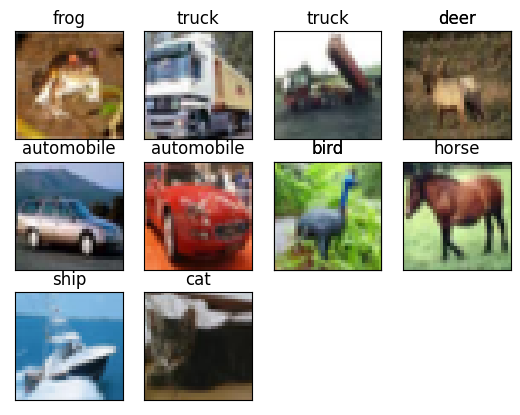

In [173]:
imshow(X_tensor[0:10], label = classes[y[0:10]].flatten().tolist(), is_int = False)

We observe:
<ul>
	<li>The objects in question such as <code>frog</code> and <code>deer</code>, do have some sort of background</li>
	<li>
		Visually, although the images are <strong>quite blurry</strong> due to the image size being <code>32x32</code>, it is still easy to tell the diffference between the classes.
	</li>
</ul>

What about the <strong>average of all images</strong>?

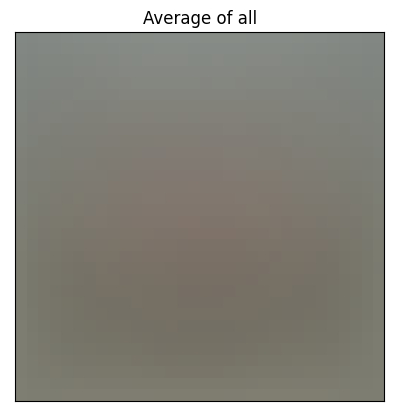

In [174]:
imshow([
	X.mean().apply(lambda x: x).values.reshape(3, 32, 32)
], ['Average of all'])

We observe that there is no significance in the average of all images.

<strong>Average image among the classes</strong><br />
We then split by the classes and find the average among each of the classes.

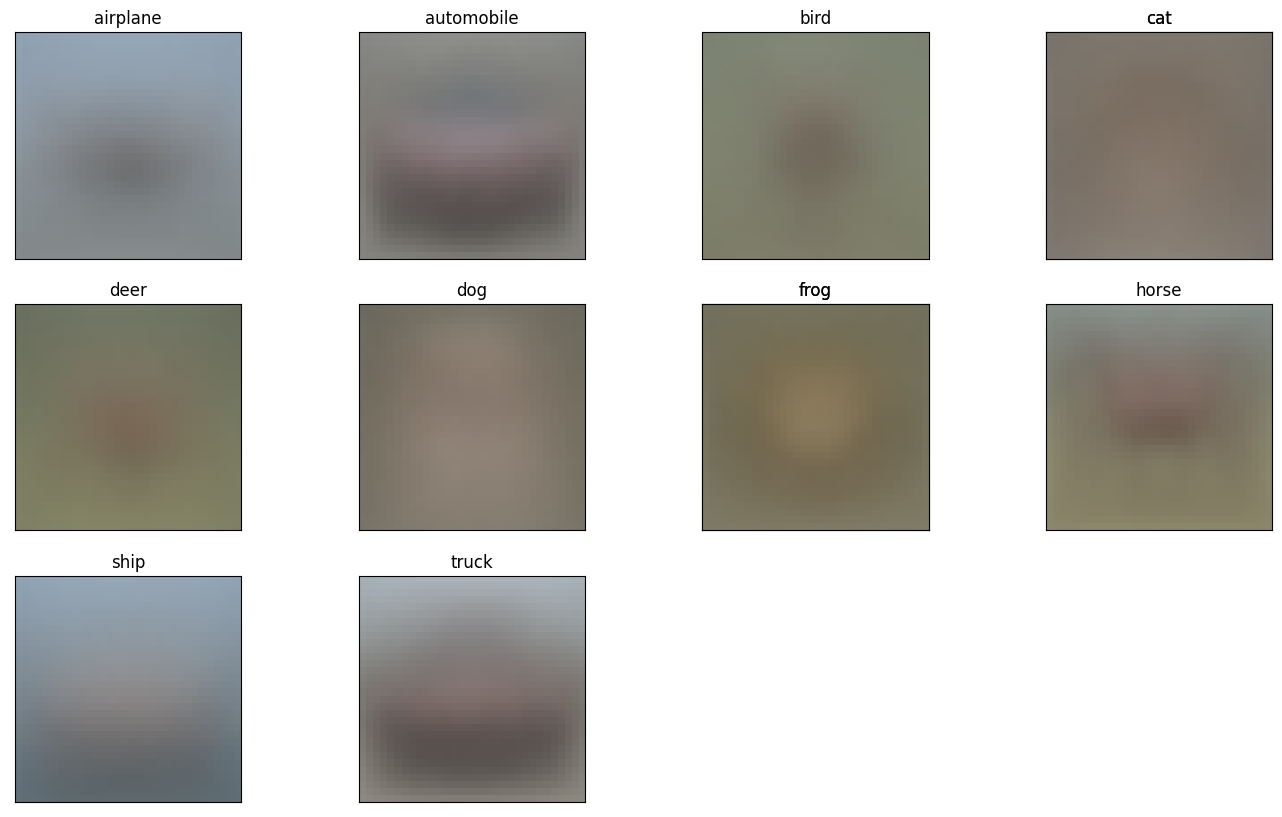

In [176]:
images = []
titles = []

for i in range(10):
	idx = np.where((y.values == i))[0].flatten()
	images.append(X.iloc[idx].values.reshape(-1, 3, 32, 32).mean(axis=0))
	titles.append(classes[i])

imshow(images, titles, figsize = (17, 10))

We observe:
<ul>
	<li>
		We manage to <em>slightly</em> make out the shape of the <code>horse</code>
	</li>
	<li>
		It appears that the average <code>horse</code> seems to have a more dominant precence when it faces the left, which is quite an interesting note.
	</li>
	<li>
		For most of the classes, we manage to make out some sort of contour in the center, however it still is pixelated and blurry.
	</li>
</ul>

### Application and Evaluation of Models
In this section, we attempt to make and apply our GAN models to tackle the CIFAR10 dataset. Additionally, for each model we try, we will also have a set of evaluation metrics and will analyze the outputs to gain a better understand of our progress.

The modeling process will go as such:
<ol>
	<li>Train the generator and discriminator</li>
	<li>Assess the progress</li>
	<li>Evaluate on a series of metrics</li>
	<li>Discover potential improvements and repeat</li>
</ol>

#### What are our <strong>evaluation metrics</strong>?
As our primary measure for **quality**, we will utilize both **Inception Score** and **Frechet Inception Distance**.

**I**

Frechet Inception Distance
Inception Score (Can't detect ModeCollapse)
Wasserstein Critic
Mode Collapse

#### Defining **Network Components**

#### Training Environment
We develop a training environment that will assist us in both training the GAN and also evaluating the performance and progress.

In [1]:
class Trainer:
	def __init__(self):
		self.dis = None
		self.gen = None
		self.real_label = 1
		self.fake_label = 0
		self.G_losses = []
		self.D_losses = []

		self.real_image_basket = None
		self.real_label_basket = None

		self.d_updates_per_step = 1
		self.d_optimizer = None
		self.device = torch.device('CUDA')
		pass

	def load_data(self, dataloader):
		pass

	def sample_data_basket():
		pass

	def train_discriminator(self):
		# d_updates_per_step - the number of discriminator updates per step
		batch_counter = 0

		real_image_basket, real_label_basket = self.sample_data_basket()
		for step_index in range(self.d_updates_per_step):
			self.D_optimizer.zero_grad()

			with torch.cuda.amp.autocast() as mpc:
				real_images = self.real_image_basket[batch_counter].to(self.device)
				real_labels = self.real_label_basket[batch_counter].to(self.device)

				fake_images, fake_labels, fake_images_eps, trsp_cost, ws, _, _ = self.generate_images(

				)

				if self.LOSS.apply_r1_reg and not self.is_stylegan:
					real_images.requires_grad_(True)

				real_images_ = self.AUG.series_augment(real_images)
				fake_images_ = self.AUG.series_augment(fake_images)

				real_dict = self.Dis(real_images_, real_labels)
				fake_dict = self.Dis(fake_images_, fake_labels, adc_fake = self.adc_fake)

				if self.AUG.apply_ada or self.AUG.apply_apa:
					self.dis_sign_real += torch.tensor((real_dict["adv_output"].sign().sum().item(),
														self.OPTIMIZATION.batch_size),
													device=self.local_rank)
					self.dis_sign_fake += torch.tensor((fake_dict["adv_output"].sign().sum().item(),
														self.OPTIMIZATION.batch_size),
													device=self.local_rank)
					self.dis_logit_real += torch.tensor((real_dict["adv_output"].sum().item(),
														self.OPTIMIZATION.batch_size),
														device=self.local_rank)
					self.dis_logit_fake += torch.tensor((fake_dict["adv_output"].sum().item(),
														self.OPTIMIZATION.batch_size),
														device=self.local_rank)

				# Multi-hinge loss
				if self.LOSS.adv_loss == "MH":
					dis_acml_loss = self.LOSS.d_loss(DDP=self.DDP, **real_dict)
					dis_acml_loss += self.LOSS.d_loss(fake_dict["adv_output"], self.lossy, DDP=self.DDP)
				else:
					dis_acml_loss = self.LOSS.d_loss(real_dict["adv_output"], fake_dict["adv_output"], DDP=self.DDP)

				# Class conditional loss
				if self.MODEL.d_cond_mtd in self.MISC.classifier_based_GAN:
					real_cond_loss = self.cond_loss(**real_dict)
					dis_acml_loss += self.LOSS.cond_lambda * real_cond_loss
					if self.MODEL.aux_cls_type == "TAC":
						tac_dis_loss = self.cond_loss_mi(**fake_dict)
						dis_acml_loss += self.LOSS.tac_dis_lambda * tac_dis_loss
					elif self.MODEL.aux_cls_type == "ADC":
						fake_cond_loss = self.cond_loss(**fake_dict)
						dis_acml_loss += self.LOSS.cond_lambda * fake_cond_loss
					else:
						pass
				else:
					real_cond_loss = "N/A"

				# Gradient Penalty
				if self.LOSS.apply_maxgp:
					maxgp_loss = cal_maxgrad_penalty(real_images=real_images,
															real_labels=real_labels,
															fake_images=fake_images,
															discriminator=self.Dis,
															device=self.local_rank)
					dis_acml_loss += self.LOSS.maxgp_lambda * maxgp_loss

				if self.LOSS.apply_r1_reg and not self.is_stylegan:
					self.r1_penalty = cal_r1_reg(adv_output=real_dict["adv_output"], images=real_images, device=self.local_rank)
					dis_acml_loss += self.LOSS.r1_lambda*self.r1_penalty

				# adjust gradients for applying gradient accumluation trick
				dis_acml_loss = dis_acml_loss / self.OPTIMIZATION.acml_steps
				batch_counter += 1

				# accumulate gradients of the discriminator
				if self.RUN.mixed_precision and not self.is_stylegan:
					self.scaler.scale(dis_acml_loss).backward()
				else:
					dis_acml_loss.backward()

			# update the discriminator using the pre-defined optimizer
			if self.RUN.mixed_precision and not self.is_stylegan:
				self.scaler.step(self.D_optimizer)
				self.scaler.update()
			else:
				self.D_optimizer.step()

			# weight clipping for discriminator 1-lipschitz constraint
			if self.LOSS.apply_wc:
				for p in self.Dis.parameters():
					p.data.clamp_(-self.LOSS.wc_bound, self.LOSS.wc_bound)

		# empty cache to discard used memory
		if self.RUN.empty_cache:
			torch.cuda.empty_cache()
		return real_cond_loss, dis_acml_loss

	def train_generator(self, current_step):
		make_GAN_trainable(self.Gen, self.Dis)
		toggle_grad(model=self.Dis, grad=False, num_freeze_layers=-1, is_stylegan=self.is_stylegan)
		toggle_grad(model=self.Gen, grad=True, num_freeze_layers=-1, is_stylegan=self.is_stylegan)
		if self.MODEL.info_type in ["discrete", "both"]:
			toggle_grad(getattr(peel_model(self.Dis), self.MISC.info_params[0]), grad=True, num_freeze_layers=-1, is_stylegan=False)
		if self.MODEL.info_type in ["continuous", "both"]:
			toggle_grad(getattr(peel_model(self.Dis), self.MISC.info_params[1]), grad=True, num_freeze_layers=-1, is_stylegan=False)
			toggle_grad(getattr(peel_model(self.Dis), self.MISC.info_params[2]), grad=True, num_freeze_layers=-1, is_stylegan=False)

		self.Gen.apply(track_bn_statistics)
		for step_index in range(self.g_updates_per_step):
			self.G_optimizer.zero_grad()
			with torch.cuda.amp.autocast() as mpc:
				fake_images, fake_labels, fake_images_eps , trsp_cost, ws, info_discrete_c, info_conti_c = self.generate_images()

				# Diff augment
				fake_images_ = self.AUG.series_augment(fake_images)

				fake_dict = self.Dis(fake_images_, fake_labels)

				if self.AUG.apply_ada:
					self.dis_sign_fake += torch.tensor((fake_dict["adv_output"].sign().sum().item(),
														self.OPTIMIZATION.batch_size),
													device=self.local_rank)
					self.dis_logit_fake += torch.tensor((fake_dict["adv_output"].sum().item(),
														self.OPTIMIZATION.batch_size),
														device=self.local_rank)

				# Multi-hinge loss
				if self.LOSS.adv_loss == "MH":
					gen_acml_loss = self.LOSS.mh_lambda * self.LOSS.g_loss(DDP=self.DDP, **fake_dict, )
				else:
					gen_acml_loss = self.LOSS.g_loss(fake_dict["adv_output"], DDP=self.DDP)

				# calculate class conditioning loss defined by "MODEL.d_cond_mtd"
				if self.MODEL.d_cond_mtd in self.MISC.classifier_based_GAN:
					fake_cond_loss = self.cond_loss(**fake_dict)
					gen_acml_loss += self.LOSS.cond_lambda * fake_cond_loss
					if self.MODEL.aux_cls_type == "TAC":
						tac_gen_loss = -self.cond_loss_mi(**fake_dict)
						gen_acml_loss += self.LOSS.tac_gen_lambda * tac_gen_loss
					elif self.MODEL.aux_cls_type == "ADC":
						adc_fake_dict = self.Dis(fake_images_, fake_labels, adc_fake=self.adc_fake)
						adc_fake_cond_loss = -self.cond_loss(**adc_fake_dict)
						gen_acml_loss += self.LOSS.cond_lambda * adc_fake_cond_loss
					pass

			# accumulate gradients of the generator
			if self.RUN.mixed_precision and not self.is_stylegan:
				self.scaler.scale(gen_acml_loss).backward()
			else:
				gen_acml_loss.backward()

		# update the generator using the pre-defined optimizer
		if self.RUN.mixed_precision and not self.is_stylegan:
			self.scaler.step(self.G_optimizer)
			self.scaler.update()
		else:
			self.G_optimizer.step()
		
		if self.RUN.empty_cache:
			torch.cuda.empty_cache()

		return gen_acml_loss

	def load(self, discriminator, generator, d_optimizer, g_optimizer, loss, aug):
		self.Dis = discriminator
		self.Gen = generator
		self.D_optimizer = d_optimizer
		self.G_optimizer = g_optimizer

	def evaluate(self):
		pass


#### Model **Baseline**: <code>DCGAN</code>
Let us begin with a simple model, `DCGAN`, which <strong>utilizes the Deep Convolutional</strong> layers in both the Generator and Discriminator networks, as opposed to the original vanilla GAN that **uses dense layers**. 

#### Applying **Spectral Normalization**
Spectral Normalization is another method that aims to enforce Lipschitz continuity onto the network.

#### Applying **Self-Attention**
What is self-attention? Traditional convolution layers are local, in the sense that the scope of interactions between inputs is restricted. If the kernel size is less than the image (which it usually is) then one can know that the top left region on an image will only have some interaction with the bottom right region after a certain number of layers. The attention mechanism introduces **global receptive field**. Specifically, it first identifies the dependencies between different tokens on an input, by performing a dot product between two weighted and position-encoded vector embeddings on the input. This leads to a weight matrix that's essentially **calculated on the fly**. The method of producing tokens are generally dependent on the architecture, with the novel Vision Transformer (ViT) using linear layers, while other transformer architectures such as Convolutional Vision Transformers use Convolution layers to generate tokens. Formally, attention is calculated by:
$$\text{Att}(Q, K, V) = \text{softmax}(\frac{QK^T}{\sqrt{d_k}})V$$

where $Q, K, V$ are the token matrices.

The authors of the SAGAN (Self Attention GANs) paper showed that their networks were able to:
> leveraging complementary features in distant portions of the image rather than local regions of fixed shape to generate consistent objects/scenarios.
(Zhang et al., 2019)

Additionally, a somewhat subtle component in the SAGAN architecture is **Conditional Batch Normalization**.

#### Applying **Projection Discriminator**
As of 2018, most frameworks that describe the architecture of cGANs simply performed some concatenation to add the conditional information $y$ to either the feature vector or at some middle layer (Miyato and Koyama, 2018).

<img src="images/projection.jpg" width=900><br />
<em>(Miyato and Koyama, 2018)</em>

#### Applying **Two-Time Update Rule**

#### Applying **BigGAN Architecture**
In fact the network we are currently using is similar to the BigGAN architecture. Thus, we attempt to 

#### Applying **MultiHinge Loss**

#### Applying <strong>Data-to-Data Cross Entropy</strong>

#### Applying <strong>DiffAugment</strong>

#### Applying <strong>Auxiliary Discriminative Classifier</strong>

#### Applying **Adaptive Weighted Discriminators**

### Hyperparameter Tuning with **Bayesian Optimization**

#### **Error Analysis**